# Entregable final

### Nombre: Diana Milena Chaparro Macias
### Fecha: Agosto 2025
### Curso: Bootcamp Data Science



#**Tema: Predicción del precio de carros marca Ford**

## Librerias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format

## Explorar los datos
* Realiza un análisis exploratorio para entender la estructura del dataset: número de registros, variables, tipos de datos, valores nulos, distribuciones, correlaciones.
* Genera gráficas iniciales para comprender tendencias, patrones y anomalías.

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "ford.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "adhurimquku/ford-car-price-prediction",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1510216678.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:      model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150 57.70        1.00
1    Focus  2018  14000       Manual     9083   Petrol  150 57.70        1.00
2    Focus  2017  13000       Manual    12456   Petrol  150 57.70        1.00
3   Fiesta  2019  17500       Manual    10460   Petrol  145 40.30        1.50
4   Fiesta  2019  16500    Automatic     1482   Petrol  145 48.70        1.00


### Limpiar y preprocesar la información

* Manejo de valores faltantes y duplicados.
* Codificación de variables categóricas y escalado de variables numéricas.
* División de los datos en entrenamiento y prueba (si se elige ML).

In [ ]:
#Vistazo al dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.00,17966.00,17966.00,17966.00,17966.00,17966.00
mean,2016.87,12279.53,23362.61,113.33,57.91,1.35
std,2.05,4741.34,19472.05,62.01,10.13,0.43
min,1996.00,495.00,1.00,0.00,20.80,0.00
25%,2016.00,8999.00,9987.00,30.00,52.30,1.00
50%,2017.00,11291.00,18242.50,145.00,58.90,1.20
75%,2018.00,15299.00,31060.00,145.00,65.70,1.50
max,2060.00,54995.00,177644.00,580.00,201.80,5.00


In [ ]:
#Buscamos nulos
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [ ]:
#Revisar duplicados en df train
print(f"Duplicados: {df.duplicated().sum()}")

Duplicados: 154


In [ ]:
#Se eliminan valores duplicados
df.drop_duplicates(inplace=True)

In [ ]:
#Ver los valores unicos de las variables categoricas
for col in df.columns:
  if(df[col].dtype == "object"):
    print(f"{col}: {df[col].unique()}")

model: [' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' 'Focus']
transmission: ['Automatic' 'Manual' 'Semi-Auto']
fuelType: ['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


In [ ]:
#En la columna model eliminar los caracteres de espacio del inicio y final de la palabra
df["model"] = df["model"].str.strip()

/tmp/ipython-input-2611144674.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='bright')


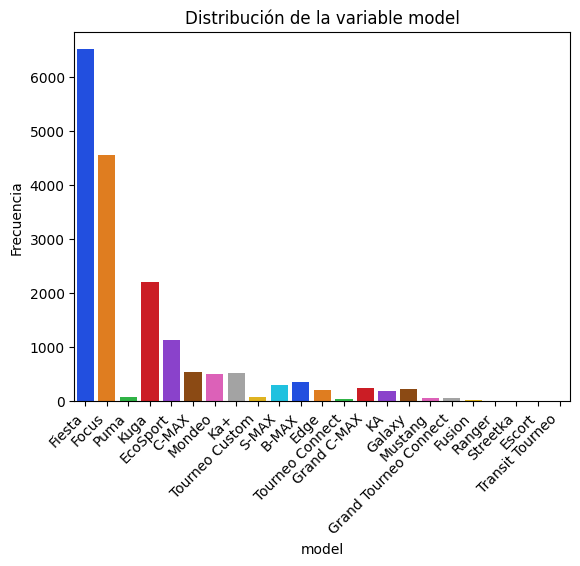

/tmp/ipython-input-2611144674.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='bright')


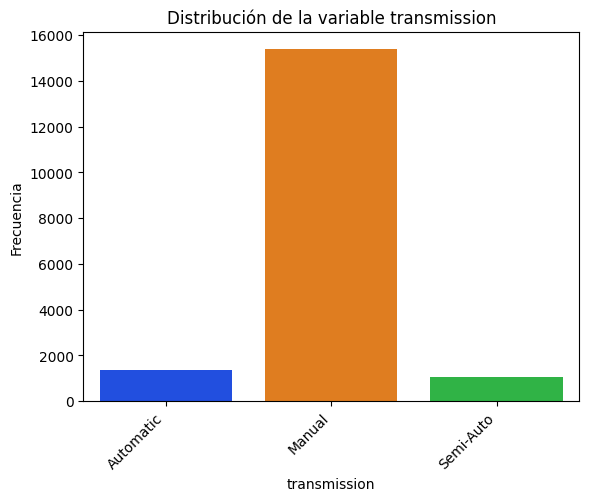

/tmp/ipython-input-2611144674.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='bright')


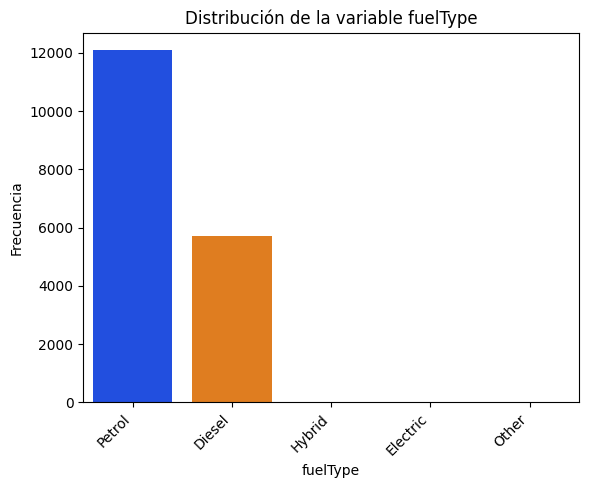

In [ ]:
#Graficar mediante grafico de barras valores unicos de las variables categoricas
for col in df.columns:
  if(df[col].dtype == "object"):
    sns.countplot(x=df[col], palette='bright')
    plt.title("Distribución de la variable " + col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha='right') # Rotate labels by 45 degrees and align to the right
    plt.show()

In [ ]:
#Extraer los valores unicos de las variables numéricas y ordenar de menor a mayor
for col in df.columns:
  if(df[col].dtype == "int64" or df[col].dtype == "float64"):
    print(f"{col}: {sorted(df[col].unique().tolist())}")

year: [1996, 1998, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2060]
price: [495, 675, 694, 795, 850, 895, 950, 999, 1095, 1200, 1290, 1294, 1295, 1299, 1400, 1449, 1450, 1475, 1495, 1500, 1550, 1595, 1695, 1775, 1795, 1799, 1850, 1885, 1895, 1950, 1954, 1990, 1995, 1999, 2095, 2100, 2175, 2195, 2250, 2275, 2280, 2295, 2299, 2350, 2375, 2395, 2400, 2479, 2491, 2495, 2499, 2500, 2595, 2645, 2650, 2690, 2694, 2695, 2699, 2725, 2750, 2790, 2795, 2799, 2876, 2890, 2895, 2900, 2950, 2975, 2991, 2995, 2998, 2999, 3000, 3195, 3199, 3200, 3249, 3250, 3295, 3299, 3334, 3350, 3395, 3399, 3450, 3485, 3491, 3493, 3495, 3499, 3500, 3575, 3595, 3650, 3689, 3690, 3691, 3692, 3695, 3698, 3699, 3784, 3789, 3790, 3795, 3800, 3820, 3875, 3888, 3890, 3895, 3899, 3900, 3918, 3989, 3990, 3991, 3995, 3999, 4000, 4045, 4150, 4170, 4190, 4195, 4198, 4199, 4200, 4250, 4290, 4295, 4298, 4299, 4340, 4350, 4352, 4391, 4395, 4399, 4430, 443

In [ ]:
#Filtrar y mostrar los datos que corresponden a year > 2020
print(df[df["year"] > 2020])

        model  year  price transmission  mileage fuelType  tax   mpg  \
17726  Fiesta  2060   6495    Automatic    54807   Petrol  205 42.80   

       engineSize  
17726        1.40  


In [ ]:
#Eliminar el registro con year = 2060 ya que es un dato incorrecto
df = df[df["year"] != 2060]

In [ ]:
#Extraer en la variable numerical_features los nombres de las variables tipo numérico
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
#convertir los valores de la columna mileage que son millas recorridas, trnasformarla a kilometros
df["mileage"] = df["mileage"].apply(lambda x: x * 1.60934)

In [ ]:
#Convertir los valores de la columna mgp que significa millas por galon, transformarla a kilometros por galon
df["mpg"] = df["mpg"].apply(lambda x: x * 1.60934)

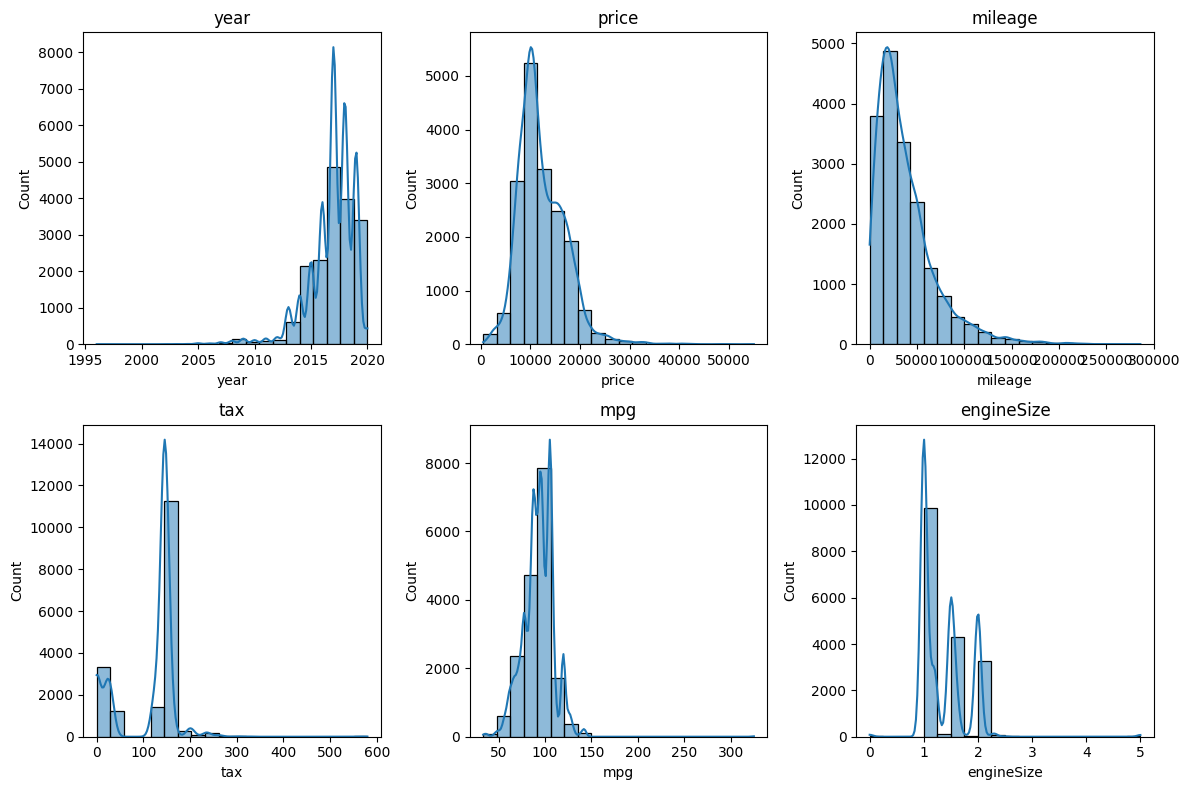

In [ ]:
#Graficar las variables numéricas
plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(2, 3, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

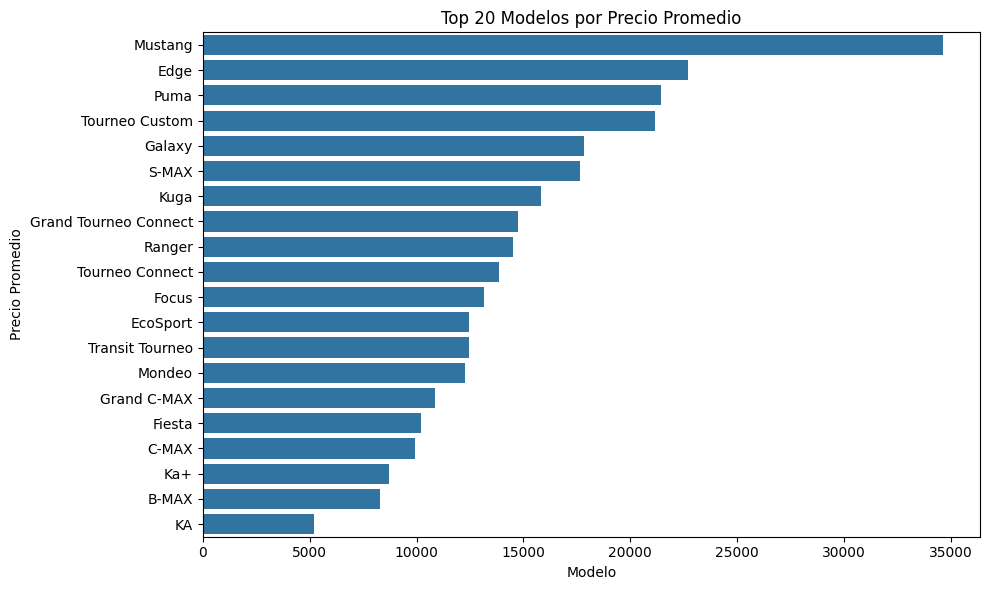

In [ ]:
#Graficar el top 20 modelos de carros por precio
N = 20
top_20_models = []
top_20_models = df.groupby('model')['price'].mean().sort_values(ascending=False).head(N)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_models.values, y=top_20_models.index)
plt.xlabel('Modelo')
plt.ylabel('Precio Promedio')
plt.title('Top 20 Modelos por Precio Promedio')
plt.tight_layout()
plt.show()


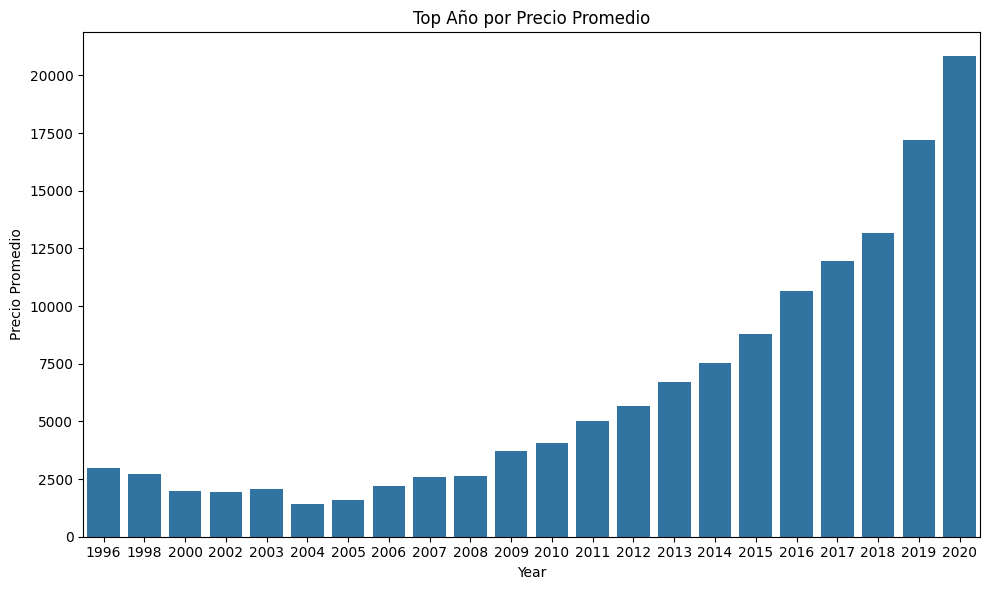

In [ ]:
top_year = df.groupby('year')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_year.index, y=top_year.values)
plt.xlabel('Year')
plt.ylabel('Precio Promedio')
plt.title('Top Año por Precio Promedio')
plt.tight_layout()
plt.show()

In [ ]:
#Extraer en la variable categorical_features los nombres de las variables tipo categorico
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

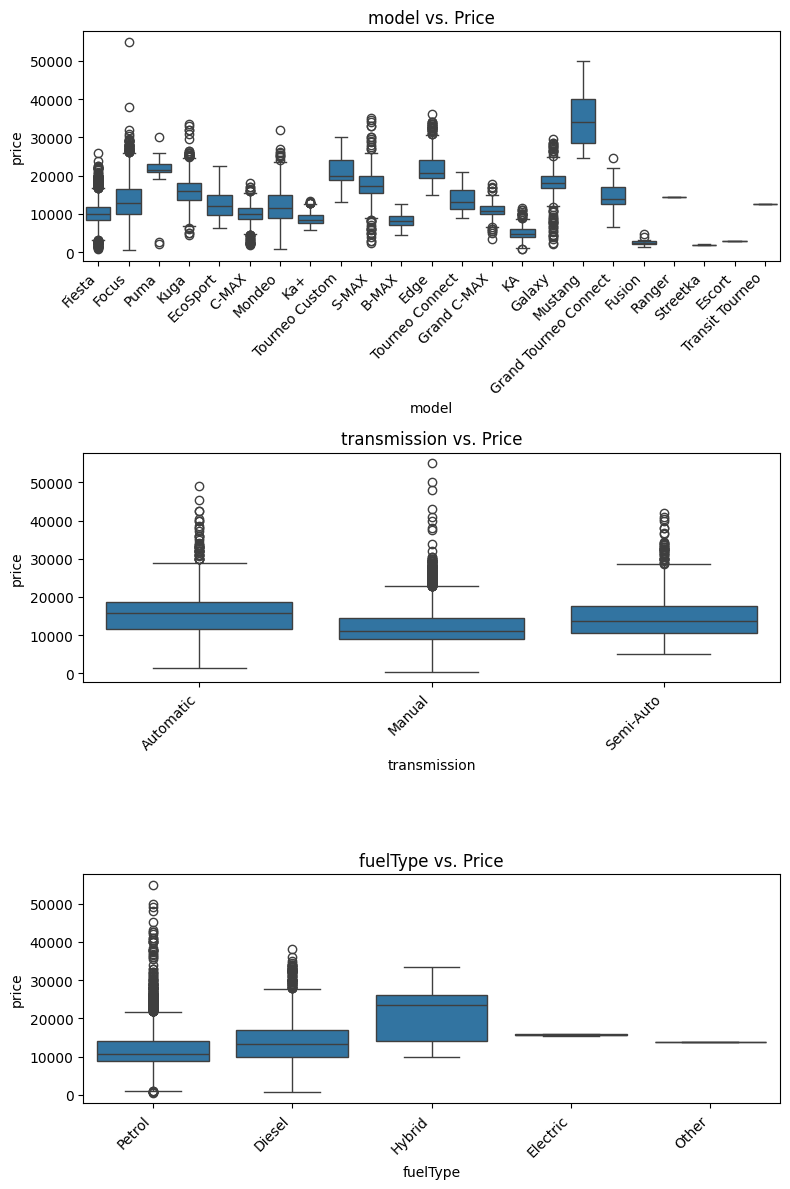

In [ ]:
plt.figure(figsize=(8, 12))
for feature in categorical_columns:
    plt.subplot(3, 1, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

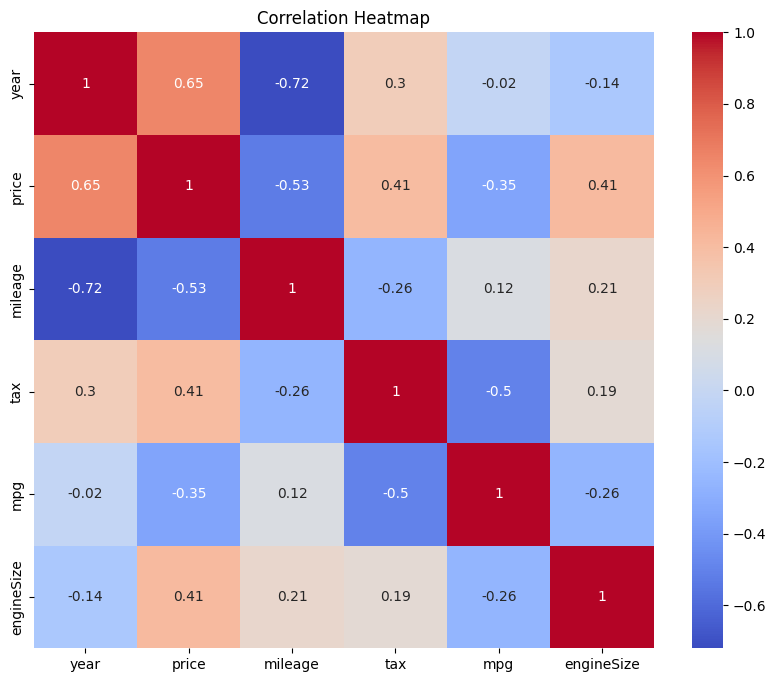

In [ ]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Preprocesamiento de datos

### Estandarizar las variables

In [ ]:
df_copy = df.copy()

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,25659.32,Petrol,150,92.86,1.00
1,Focus,2018,14000,Manual,14617.64,Petrol,150,92.86,1.00
2,Focus,2017,13000,Manual,20045.94,Petrol,150,92.86,1.00
3,Fiesta,2019,17500,Manual,16833.70,Petrol,145,64.86,1.50
4,Fiesta,2019,16500,Automatic,2385.04,Petrol,145,78.37,1.00


In [ ]:
# Feature scaling
numerical_features.remove('price')

In [ ]:
#Separar X y Y con la función train test split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocesamiento

## Entrenamiento y evaluación
Entrenar uno o más modelos utilizando .fit()

Escoger al menos 3 modelos de regresión.

Entrenar cada modelo usando el conjunto de entrenamiento.

Training DT model...


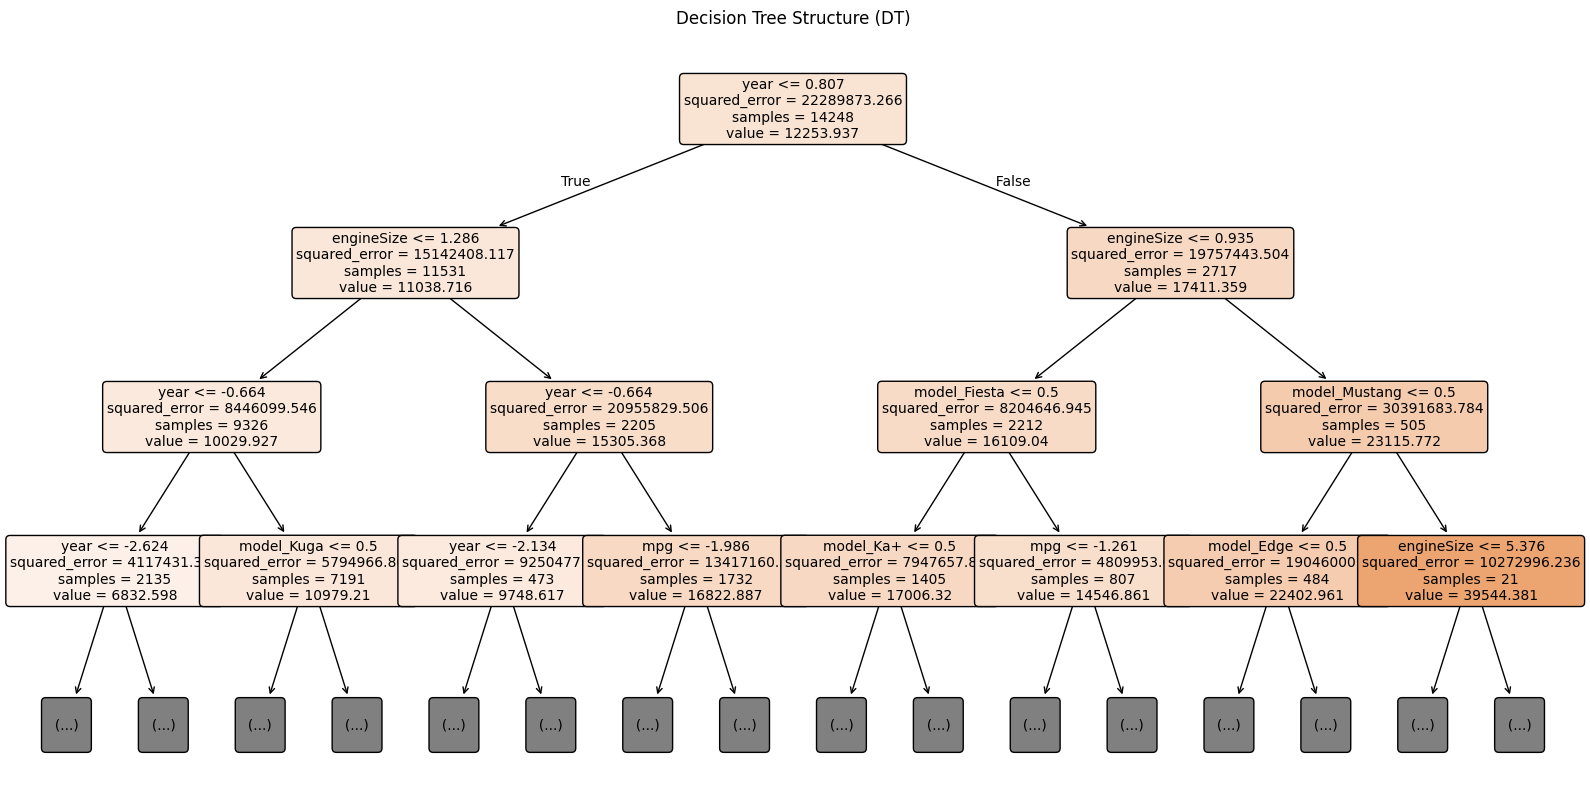

Training RF model...


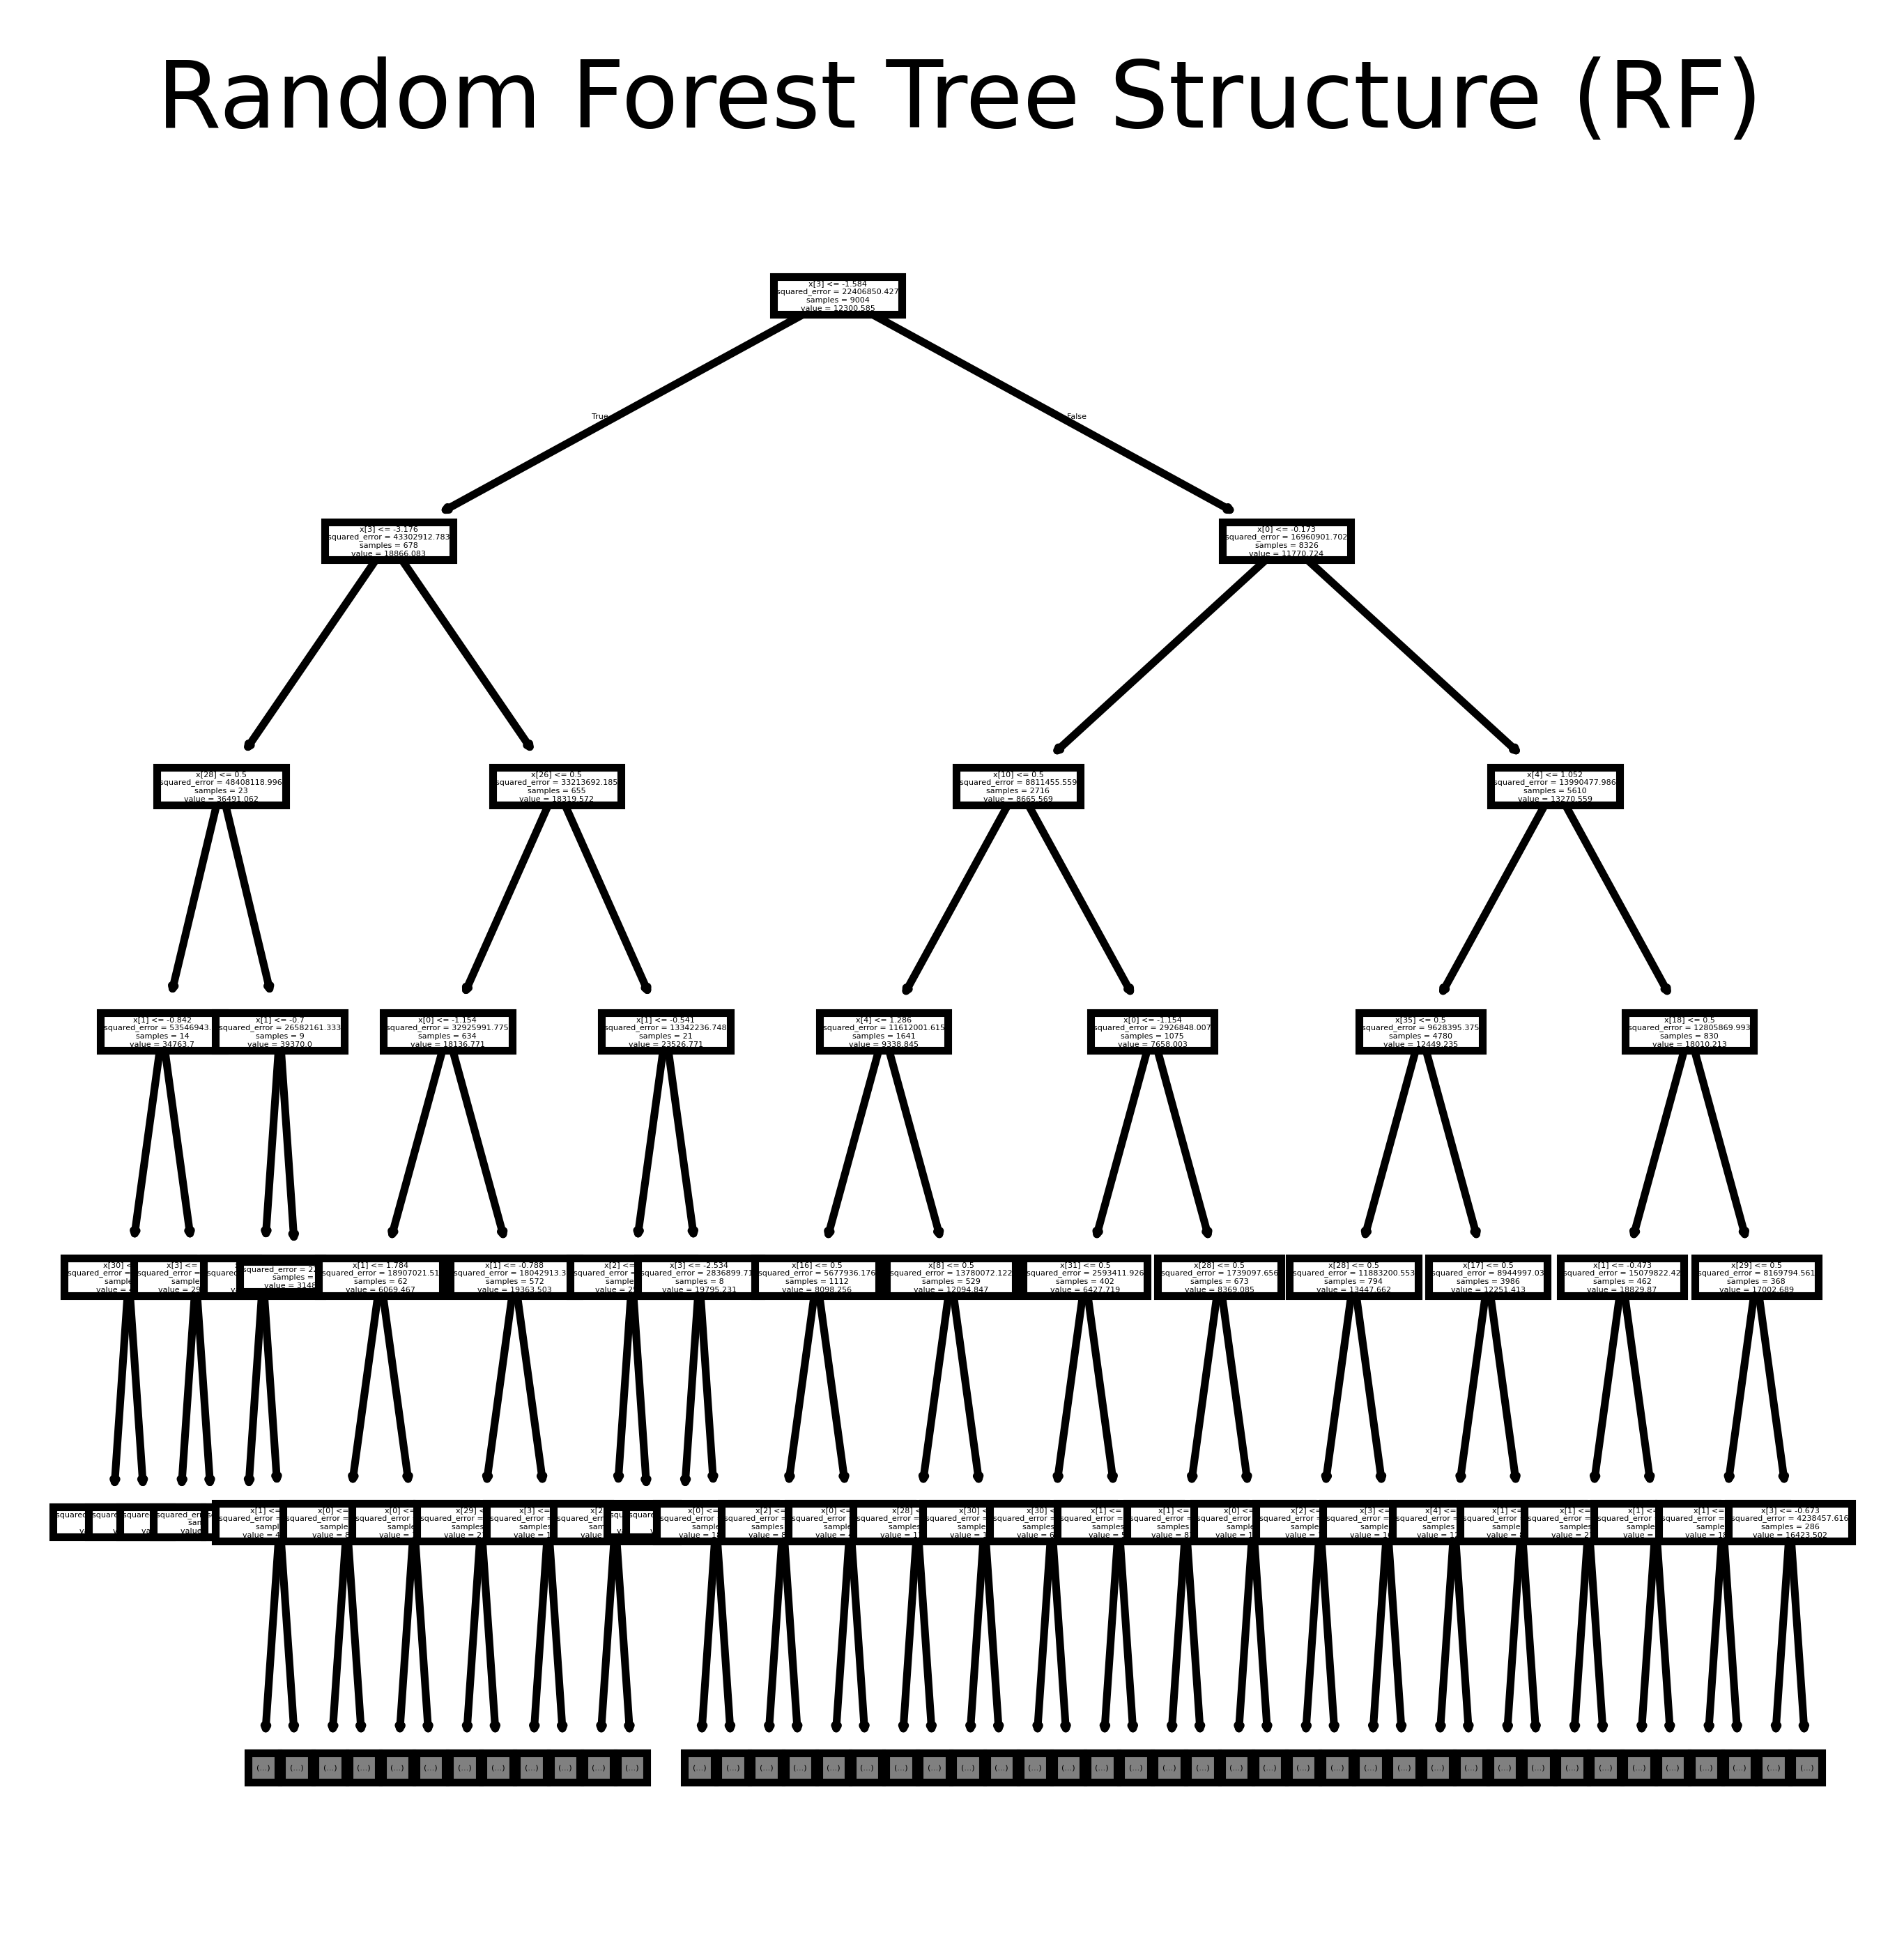

Training XGB model...


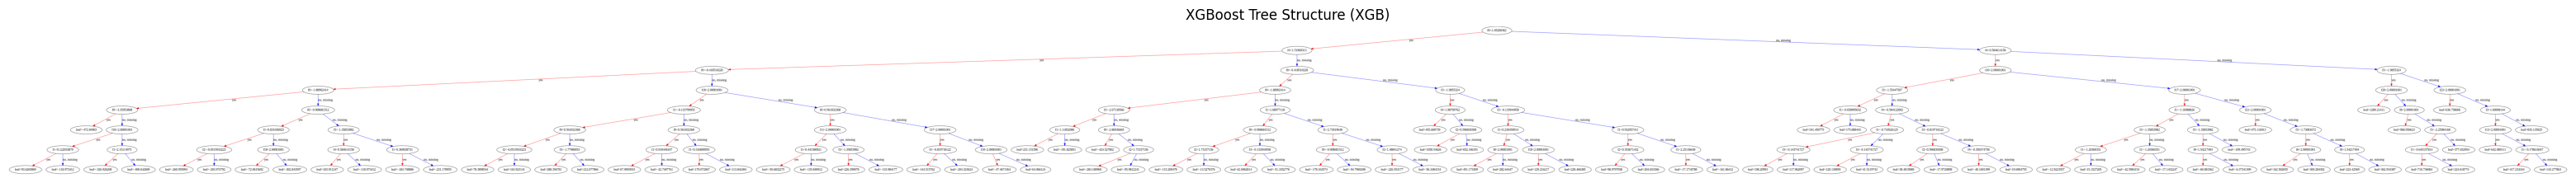

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz


from xgboost import plot_tree as xgb_plot_tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=np.number).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Use handle_unknown='ignore' for new categories in test set

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

models = {
    "DT": DecisionTreeRegressor(random_state=42),
    "RF": RandomForestRegressor(random_state=42,  max_features="sqrt",max_depth=20, min_samples_split=5, n_estimators=800, n_jobs=-1),
    "XGB": XGBRegressor(
        n_estimators=800,
        learning_rate=0.05,
        max_depth=7,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42,
        tree_method="hist",
        eval_metric="rmse",
        n_jobs=-1)
}

rows = []
fitted_pipelines = {}

for name, reg in models.items():
  print(f"Training {name} model...")
  # Create a pipeline that first preprocesses the data and then applies the regressor
  pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', reg)])

  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  rows.append({
  "Modelo": name, "R2": r2, "MAE": mae, "RMSE": rmse,
  })
  fitted_pipelines[name] = pipeline # Store the entire pipeline

  # Plot Decision Tree structure (limited depth)
  if name == "DT":
      plt.figure(figsize=(20, 10))
      # We need to get the feature names after one-hot encoding for plotting
      # The one-hot encoder in the pipeline has the get_feature_names_out method
      ohe_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
      all_feature_names = numerical_features.tolist() + ohe_feature_names.tolist()

      plot_tree(
          pipeline.named_steps['regressor'], # Plot the regressor from the pipeline
          feature_names=all_feature_names,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3  # Limit the depth for visualization
      )
      plt.title(f"Decision Tree Structure ({name})")
      plt.show()
  elif name == "RF":
      fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
      plot_tree(pipeline.named_steps['regressor'].estimators_[0], max_depth=5)
      plt.title(f"Random Forest Tree Structure ({name})")
      plt.show()
  elif name == "XGB":
      plt.figure(figsize=(40, 20))
      xgb_plot_tree(pipeline.named_steps['regressor'].get_booster(), tree_idx=0,ax=plt.gca())
      plt.title(f"XGBoost Tree Structure ({name})")
      plt.show()

### Comparación de Modelos

Compara el rendimiento utilizando métricas como MAE (Mean Absolute Error), RMSE (Root Mean Squared Error) y R².

Graficar los resultados para un análisis visual del desempeño del modelo.

In [ ]:
results_df = pd.DataFrame(rows).sort_values(by=["R2","MAE"], ascending=[False, True]).reset_index(drop=True)
print(results_df)

  Modelo   R2     MAE    RMSE
0    XGB 0.94  807.49 1148.36
1     RF 0.94  813.09 1150.23
2     DT 0.89 1081.59 1589.32


In [ ]:
X_test

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
1034,Galaxy,2017,Manual,81376.28,Diesel,150,90.93,2.00
16978,Focus,2005,Manual,140865.53,Petrol,235,64.05,2.00
2864,Focus,2016,Manual,22241.08,Petrol,200,66.79,2.00
11569,Focus,2017,Manual,42134.13,Petrol,145,66.79,2.00
10089,Focus,2018,Manual,42647.51,Petrol,150,96.72,1.00
...,...,...,...,...,...,...,...,...
13757,Focus,2018,Manual,26409.27,Petrol,145,66.79,2.00
6309,Fiesta,2017,Manual,39007.18,Petrol,20,101.07,1.00
15889,Fiesta,2018,Manual,19680.62,Petrol,145,94.79,1.00
14983,Fiesta,2016,Manual,6741.53,Petrol,125,87.39,1.20


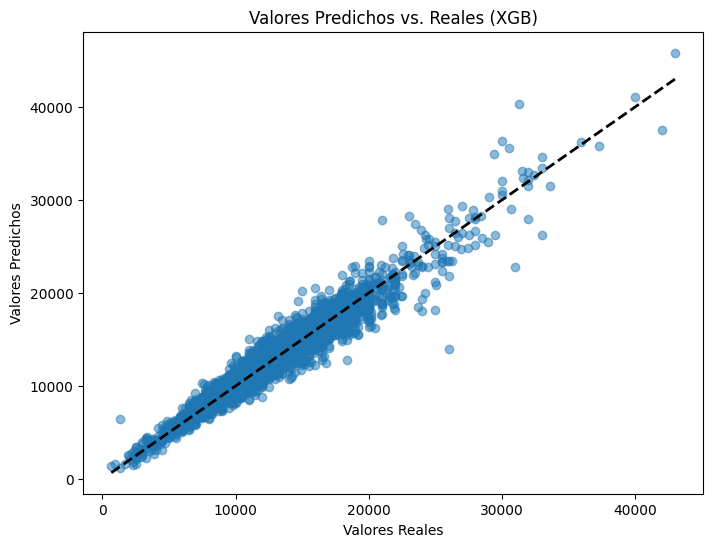

In [ ]:
# Realizar predicciones con el modelo con mejor resultado

y_pred = fitted_pipelines['XGB'].predict(X_test)

# Crear un gráfico de dispersión de valores predichos vs. reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Reales (XGB)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de referencia
plt.show()

### Predicción

In [ ]:
#mejorar el modelo usando diferentes hyperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1034,14995,15504.22,-509.22
16978,2295,1876.89,418.11
2864,14950,16315.44,-1365.44
11569,17890,16351.00,1539.00
10089,11795,11845.60,-50.60
...,...,...,...
13757,19315,18745.67,569.33
6309,9190,10056.07,-866.07
15889,10498,12250.32,-1752.32
14983,7499,8836.77,-1337.77


In [ ]:
#Descargar modelo y guardarlo
import joblib
joblib.dump(fitted_pipelines['XGB'], 'best_model.pkl')

['best_model.pkl']

# Conclusiones y hallazgos
**¿Qué patrones relevantes descubriste?**
* Distribución del modelo: Los modelos más frecuentes en el conjunto de datos son Fiesta, Focus y Kuga.
* Distribución de precios: La distribución de precios es asimétrica, con la mayoría de los vehículos con un precio inferior a 20 000 $.
* Año vs. Precio: Existe una clara tendencia al alza en el precio promedio de los autos con los años más recientes, salvo una caída alrededor de 2004-2005. El precio promedio de los autos de 2020 es significativamente más alto que en otros años.
* Modelo vs. Precio: Los diagramas de caja muestran que los diferentes modelos tienen diferentes rangos de precios y distribuciones. Los modelos Mustang y Edge parecen tener precios medianos más altos y rangos de precios más amplios en comparación con modelos como el KA o el B-MAX.
* Transmisión, tipo de combustible vs. Precio: Los diagramas de caja también indican que la transmisión y el tipo de combustible influyen en el precio, siendo los autos automáticos e híbridos/eléctricos generalmente los más altos.
* Mapa de correlación:
El año tiene una fuerte correlación positiva con el precio y una fuerte correlación negativa con el kilometraje. Esto es previsible, ya que los autos más nuevos tienden a tener precios más altos y menor kilometraje.
El precio tiene una correlación negativa moderada con el kilometraje y correlaciones positivas moderadas con los impuestos y el tamaño del motor. El consumo de combustible por litro (mpg) tiene una correlación negativa moderada con los impuestos y el tamaño del motor, lo cual es lógico, ya que los coches con motores más grandes e impuestos más altos podrían ser menos eficientes en términos de consumo de combustible.

**¿Qué modelo fue mejor y por qué?**

* Se entrenaron tres modelos de regresión (Árbol de decisión, Bosque aleatorio y XGBoost) para predecir el precio.
El modelo XGBoost tuvo un rendimiento ligeramente mejor que los modelos Bosque aleatorio y Árbol de decisión, según las puntuaciones de R², MAE y RMSE en el conjunto de prueba. Los modelos XGBoost y Bosque aleatorio alcanzaron un R² de aproximadamente 0,94, lo que indica que pueden explicar aproximadamente el 94 % de la varianza en los precios de los coches.
MAE (Error Absoluto Medio): Representa la diferencia absoluta promedio entre los precios predichos y los reales. Un MAE bajo significa que, en promedio, las predicciones se aproximan más a los valores reales. RMSE (Error Cuadrático Medio): Similar al MAE, pero otorga mayor peso a los errores mayores. Un RMSE menor indica menos errores de predicción grandes.

**¿Cómo podrían usarse estos hallazgos en un entorno real?**
* En este caso, este modelo se puede usar para determinar el precio de un vehículo Ford de acuerdo a sus características.
